In [42]:
! pip install bs4

In [43]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup


In [44]:
URL='https://www.goodreads.com/list/show/1381.Best_Series'

In [45]:
page=requests.get(URL)
page

<Response [200]>

In [46]:
page.status_code

200

In [47]:
htmlcode=page.text

In [48]:
soup=BeautifulSoup(htmlcode)

In [49]:
print(soup.prettify())

<!DOCTYPE html>
<html class="desktop withSiteHeaderTopFullImage">
 <head>
  <title>
   Best Series (3052 books)
  </title>
  <meta content="3,055 books based on 10596 votes: Harry Potter and the Philosopher’s Stone by J.K. Rowling, The Lightning Thief by Rick Riordan, The Hunger Games by Suza..." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://www.goodreads.com/list/show/1381.Best_Series" rel="canonical"/>
  <script type="text/javascript">
   var ue_t0=window.ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "539-7140791-6233745";
    var ue_id = "8SPKEYNRH6ANGDCCZ6EY";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}functio

#### URL=`https://www.goodreads.com/list/show/1381.Best_Series`

#### title - > span itemprop = `name` 
#### author - > span itemprop = `author`
#### rating - > span class = `minirating`
#### score - > a href = `#`
#### votes - > span class = `smallText uitext`
                


In [50]:
title=soup.find('span',attrs={'itemprop':'name'})
title.text

'Harry Potter and the Philosopher’s Stone (Harry Potter, #1)'

In [51]:
author=soup.find('span',attrs={'itemprop':'author'})
author.text

'\n\nJ.K. Rowling\n\n'

In [52]:
rating=soup.find('span',attrs={'class':'minirating'})
rating.text

' 4.47 avg rating — 9,201,052 ratings'

In [53]:
score=soup.find('a',attrs={'href':'#'})
score.text

'score: 344,918'

In [54]:
votes=soup.find('span',attrs={'class':'smallText uitext'})
votes.text

'\nscore: 344,918,\n              and\n3,480 people voted\n              \u2003\n              \n            '

#### All URL's

#### https://www.goodreads.com/list/show/1381.Best_Series?page=2
#### https://www.goodreads.com/list/show/1381.Best_Series?page=3
#### https://www.goodreads.com/list/show/1381.Best_Series?page=4
#### https://www.goodreads.com/list/show/1381.Best_Series?page=5
#### https://www.goodreads.com/list/show/1381.Best_Series?page=6

In [55]:
# Code



'''
URL='https://www.goodreads.com/list/show/1381.Best_Series?page=6'
'''
for i in range(1,7):
    print('https://www.goodreads.com/list/show/1381.Best_Series?page={}'.format(i))

https://www.goodreads.com/list/show/1381.Best_Series?page=1
https://www.goodreads.com/list/show/1381.Best_Series?page=2
https://www.goodreads.com/list/show/1381.Best_Series?page=3
https://www.goodreads.com/list/show/1381.Best_Series?page=4
https://www.goodreads.com/list/show/1381.Best_Series?page=5
https://www.goodreads.com/list/show/1381.Best_Series?page=6


#### URL = `https://www.goodreads.com/list/show/1381.Best_Series`

#### title - > span itemprop = `name` 
#### author - > span itemprop = `author`
#### rating - > span class = `minirating`
#### score - > a href=`#`
#### votes - > span class = `smallText uitext`

### Web Scrapping

In [56]:
title=[]
author=[]
rating=[]
score=[]
votes=[]

for i in range(1,6):
    URL='https://www.goodreads.com/list/show/1381.Best_Series?page={}'.format(i)
    
    page=requests.get(URL)
    htmlcode=page.text
    soup=BeautifulSoup(htmlcode)
    
    for x in soup.find_all('td',attrs={'width':'100%'}):
        
        Title=x.find('span',attrs={'itemprop':'name'})
        if Title is None:
            title.append(np.NaN)
        else:
            title.append(Title.text)
            
        Author=x.find('span',attrs={'itemprop':'author'})
        if Author is None:
            author.append(np.NaN)
        else:
            author.append(Author.text)
            
        Rating=x.find('span',attrs={'class':'minirating'})
        if Rating is None:
            rating.append(np.NaN)
        else:
            rating.append(Rating.text)   
            
        Score=x.find('a',attrs={'href':'#'})
        if Score is None:
            score.append(np.NaN)
        else:
            score.append(Score.text)
            
        Votes=x.find('span',attrs={'class':'smallText uitext'})
        if Votes is None:
            votes.append(np.NaN)
        else:
            votes.append(Votes.text)
            

In [57]:
print(len(title))
print(len(author))
print(len(rating))
print(len(score))
print(len(votes))

500
500
500
500
500


#### Create a DataFrame and save it in csv file

In [58]:
df = pd.DataFrame({'Title' :title,'Author':author,'Rating' : rating,'Score':score,'Votes':votes})

In [59]:
df

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,201,052 ratings","score: 344,918","\nscore: 344,918,\n and\n3,480 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.29 avg rating — 2,668,080 ratings","score: 150,442","\nscore: 150,442,\n and\n1,543 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.33 avg rating — 7,891,238 ratings","score: 143,820","\nscore: 143,820,\n and\n1,472 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,905,288 ratings","score: 141,209","\nscore: 141,209,\n and\n1,446 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.15 avg rating — 3,678,693 ratings","score: 135,223","\nscore: 135,223,\n and\n1,393 pe..."
...,...,...,...,...,...
495,"Night Pleasures (Dark-Hunter, #1)",\n\nSherrilyn Kenyon (Goodreads Author)\n\n,"4.20 avg rating — 77,516 ratings",score: 546,"\nscore: 546,\n and\n8 people vot..."
496,"Slated (Slated, #1)",\n\nTeri Terry (Goodreads Author)\n\n,"4.07 avg rating — 30,090 ratings",score: 545,"\nscore: 545,\n and\n6 people vot..."
497,"Another Fine Myth (Myth Adventures, #1)",\n\nRobert Lynn Asprin\n\n,"4.04 avg rating — 23,282 ratings",score: 545,"\nscore: 545,\n and\n7 people vot..."
498,"Genghis: Birth of an Empire (Conqueror, #1)",\n\nConn Iggulden\n\n,"4.38 avg rating — 32,094 ratings",score: 540,"\nscore: 540,\n and\n8 people vot..."


In [60]:
import os
os.getcwd()

'C:\\Users\\bbhav\\Downloads'

In [61]:
df.to_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv", index = False)

In [62]:
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,201,052 ratings","score: 344,918","\nscore: 344,918,\n and\n3,480 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.29 avg rating — 2,668,080 ratings","score: 150,442","\nscore: 150,442,\n and\n1,543 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.33 avg rating — 7,891,238 ratings","score: 143,820","\nscore: 143,820,\n and\n1,472 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,905,288 ratings","score: 141,209","\nscore: 141,209,\n and\n1,446 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.15 avg rating — 3,678,693 ratings","score: 135,223","\nscore: 135,223,\n and\n1,393 pe..."


In [22]:
df.to_excel(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.xlsx")

# Extracting the Details

In [63]:
import numpy as np
import pandas as pd

import re
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv")
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,201,052 ratings","score: 344,918","\nscore: 344,918,\n and\n3,480 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.29 avg rating — 2,668,080 ratings","score: 150,442","\nscore: 150,442,\n and\n1,543 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.33 avg rating — 7,891,238 ratings","score: 143,820","\nscore: 143,820,\n and\n1,472 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,905,288 ratings","score: 141,209","\nscore: 141,209,\n and\n1,446 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.15 avg rating — 3,678,693 ratings","score: 135,223","\nscore: 135,223,\n and\n1,393 pe..."


### Cleaning Author col

In [25]:
Author

<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/2958084.Kristen_Ashley" itemprop="url"><span itemprop="name">Kristen Ashley</span></a> <span class="greyText">(Goodreads Author)</span>
</div>
</span>

In [26]:
# regex=r'\>[A-Za-z]+\s[A-Za-z]+'

In [66]:
df['Author']=df['Author'].str.replace('\n','').replace('\(Goodreads Author\)','',regex=True)

In [67]:
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"4.47 avg rating — 9,201,052 ratings","score: 344,918","\nscore: 344,918,\n and\n3,480 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"4.29 avg rating — 2,668,080 ratings","score: 150,442","\nscore: 150,442,\n and\n1,543 pe..."
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.33 avg rating — 7,891,238 ratings","score: 143,820","\nscore: 143,820,\n and\n1,472 pe..."
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"4.08 avg rating — 1,905,288 ratings","score: 141,209","\nscore: 141,209,\n and\n1,446 pe..."
4,"Divergent (Divergent, #1)",Veronica Roth,"4.15 avg rating — 3,678,693 ratings","score: 135,223","\nscore: 135,223,\n and\n1,393 pe..."


### Splitting Rating col

In [68]:
df[['Ratings','Reviews']]=df['Rating'].str.split('—',expand=True)

In [69]:
df.head()

,Title,Author,Rating,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"4.47 avg rating — 9,201,052 ratings","score: 344,918","\nscore: 344,918,\n and\n3,480 pe...",4.47 avg rating,"9,201,052 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"4.29 avg rating — 2,668,080 ratings","score: 150,442","\nscore: 150,442,\n and\n1,543 pe...",4.29 avg rating,"2,668,080 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.33 avg rating — 7,891,238 ratings","score: 143,820","\nscore: 143,820,\n and\n1,472 pe...",4.33 avg rating,"7,891,238 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"4.08 avg rating — 1,905,288 ratings","score: 141,209","\nscore: 141,209,\n and\n1,446 pe...",4.08 avg rating,"1,905,288 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,"4.15 avg rating — 3,678,693 ratings","score: 135,223","\nscore: 135,223,\n and\n1,393 pe...",4.15 avg rating,"3,678,693 ratings"


In [70]:
# Dropping Rating col

df.drop('Rating',axis=1,inplace=True)

In [71]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"score: 344,918","\nscore: 344,918,\n and\n3,480 pe...",4.47 avg rating,"9,201,052 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"score: 150,442","\nscore: 150,442,\n and\n1,543 pe...",4.29 avg rating,"2,668,080 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"score: 143,820","\nscore: 143,820,\n and\n1,472 pe...",4.33 avg rating,"7,891,238 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"score: 141,209","\nscore: 141,209,\n and\n1,446 pe...",4.08 avg rating,"1,905,288 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,"score: 135,223","\nscore: 135,223,\n and\n1,393 pe...",4.15 avg rating,"3,678,693 ratings"


### Cleaning Score col

In [72]:
df['Score']=df['Score'].str.replace('score: ','')

In [73]:
df.Score=df.Score.apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

In [74]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,"\nscore: 344,918,\n and\n3,480 pe...",4.47 avg rating,"9,201,052 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,"\nscore: 150,442,\n and\n1,543 pe...",4.29 avg rating,"2,668,080 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,"\nscore: 143,820,\n and\n1,472 pe...",4.33 avg rating,"7,891,238 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,"\nscore: 141,209,\n and\n1,446 pe...",4.08 avg rating,"1,905,288 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,135223,"\nscore: 135,223,\n and\n1,393 pe...",4.15 avg rating,"3,678,693 ratings"


### Cleaning Votes col

In [75]:
regex=r'(.*)\s?people'

df['Votes']=df['Votes'].apply(lambda x:re.findall(regex,x))

In [76]:
df.Votes=df.Votes.apply(lambda x:''.join(x))

In [77]:
df.Votes=df.Votes.apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

In [78]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47 avg rating,"9,201,052 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29 avg rating,"2,668,080 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33 avg rating,"7,891,238 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08 avg rating,"1,905,288 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15 avg rating,"3,678,693 ratings"


### Cleaning Ratings col

In [80]:
df['Ratings']=df['Ratings'].str.replace('avg rating','').replace('really liked it','',regex=True)

In [83]:
df['Ratings']=df['Ratings'].str.replace('avg rating','').replace('it was amazing','',regex=True)

In [84]:
df['Ratings']=df['Ratings'].apply(lambda x: float(x))

In [85]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,"9,201,052 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,"2,668,080 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,"7,891,238 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,"1,905,288 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,"3,678,693 ratings"


### Cleaning Reviews col

In [86]:
df['Reviews']=df['Reviews'].str.replace('ratings','')

In [87]:
df['Reviews']=df['Reviews'].apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

In [88]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693


### Creating Overview col

In [89]:
df['Overview']=df['Ratings'].apply(lambda x: 'Excellent' if x>=4.5 else('Good' if x>=4 else('Average' if x>=3 else x)))

In [90]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good


### Creating Hashtag col

In [91]:
Title

<span aria-level="4" itemprop="name" role="heading">Own the Wind (Chaos, #1)</span>

In [92]:
df['Hashtag']='#1'

In [93]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good,#1


In [94]:
df['Hashtag'][90:91]='#0'

In [95]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good,#1


In [96]:
df.Hashtag.value_counts()

#1    499
#0      1
Name: Hashtag, dtype: int64

In [97]:
df['Hashtag'][467:468]='#2'

In [98]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good,#1


In [ ]:
##regex=r'\W\d'
##df['Hashtag']=df['Title'].apply(lambda x:re.findall(regex,x))

In [ ]:
##df.head()

In [99]:
df.Hashtag.value_counts()

#1    498
#0      1
#2      1
Name: Hashtag, dtype: int64

### Creating Denotes col

In [100]:
df['Denotes']=df['Hashtag'].apply(lambda x: 'First Book' if x=='#1' else('Prequel' if x=='#0' else('Prequel of the next Book' if x=='#2' else x)))

In [101]:
df.Denotes=df.Denotes.apply(lambda x:''.join(x))

In [102]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book


In [103]:
df.Hashtag=df.Hashtag.apply(lambda x:''.join(x))

In [104]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book


### Creating Series col

In [105]:
regex=r'\((.*)?,'

df['Series']=df['Title'].apply(lambda x:re.findall(regex,x))

In [106]:
df.Series=df.Series.apply(lambda x:''.join(x))

In [107]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,"Divergent (Divergent, #1)",Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent


### Cleaning Title col

In [108]:
regex=r'(.*)\('

df['Title']=df['Title'].apply(lambda x:re.findall(regex,x))

In [109]:
df['Title']=df['Title'].apply(lambda x:''.join(x))

In [110]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent


In [111]:
# replacing the empty rows with nan value

df=df.replace(r"^\s*$",np.nan,regex=True)

In [112]:
df

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent
...,...,...,...,...,...,...,...,...,...,...
495,Night Pleasures,Sherrilyn Kenyon,546,8,4.20,77516,Good,#1,First Book,Dark-Hunter
496,Slated,Teri Terry,545,6,4.07,30090,Good,#1,First Book,Slated
497,Another Fine Myth,Robert Lynn Asprin,545,7,4.04,23282,Good,#1,First Book,Myth Adventures
498,Genghis: Birth of an Empire,Conn Iggulden,540,8,4.38,32094,Good,#1,First Book,Conqueror


In [113]:
df.dropna(inplace=True)

In [114]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent


In [115]:
df.reset_index(inplace=True)

In [116]:
df.head()

,index,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,1,The Lightning Thief,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,2,The Hunger Games,Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,3,City of Bones,Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,4,Divergent,Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent


In [117]:
df.drop(["index"],axis=1,inplace=True)

In [118]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent


In [119]:
#1 means the first book of the Series 
#0 means the prequel of the Series
#2 means the second book or prequel of the next book

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     475 non-null    object 
 1   Author    475 non-null    object 
 2   Score     475 non-null    int64  
 3   Votes     475 non-null    int64  
 4   Ratings   475 non-null    float64
 5   Reviews   475 non-null    int64  
 6   Overview  475 non-null    object 
 7   Hashtag   475 non-null    object 
 8   Denotes   475 non-null    object 
 9   Series    475 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 37.2+ KB


In [121]:
df.isna().sum()

Title       0
Author      0
Score       0
Votes       0
Ratings     0
Reviews     0
Overview    0
Hashtag     0
Denotes     0
Series      0
dtype: int64

In [122]:
df.describe()

,Score,Votes,Ratings,Reviews
count,475.000000,475.000000,475.000000,4.750000e+02
mean,7650.442105,81.941053,4.028632,3.023137e+05
std,23119.832699,236.064839,0.199817,7.694867e+05
min,538.000000,6.000000,3.450000,5.500000e+01
25%,855.500000,10.000000,3.900000,4.000550e+04
50%,1517.000000,19.000000,4.030000,8.870900e+04
75%,4363.000000,48.500000,4.160000,2.511345e+05
max,344918.000000,3480.000000,4.680000,9.201052e+06


In [123]:
# Analysis

In [124]:
x=df.groupby(["Votes"])[['Title']]
x.first()

,Title
Votes,
6,Awakening
7,New England Witch Chronicles
8,Zoroastrians' Fight for Survival
9,Trust: A New Beginning
10,The Rising
...,...
1393,Divergent
1446,City of Bones
1472,The Hunger Games


In [125]:
l=df.groupby(['Title'])[['Ratings']]

In [126]:
l.first()

,Ratings
Title,
1st to Die,4.09
A Bear Called Paddington,4.23
A Court of Thorns and Roses,4.20
A Darker Shade of Magic,4.07
A Discovery of Witches,4.02
...,...
Wool Omnibus,4.21
Written in Red,4.25
You Slay Me,3.99


In [127]:
df.isnull().sum()

Title       0
Author      0
Score       0
Votes       0
Ratings     0
Reviews     0
Overview    0
Hashtag     0
Denotes     0
Series      0
dtype: int64

## Data Visualization

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,344918,3480,4.47,9201052,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,150442,1543,4.29,2668080,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,143820,1472,4.33,7891238,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141209,1446,4.08,1905288,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135223,1393,4.15,3678693,Good,#1,First Book,Divergent


### Univariate

### > I want to know which Author has written highest number of Books

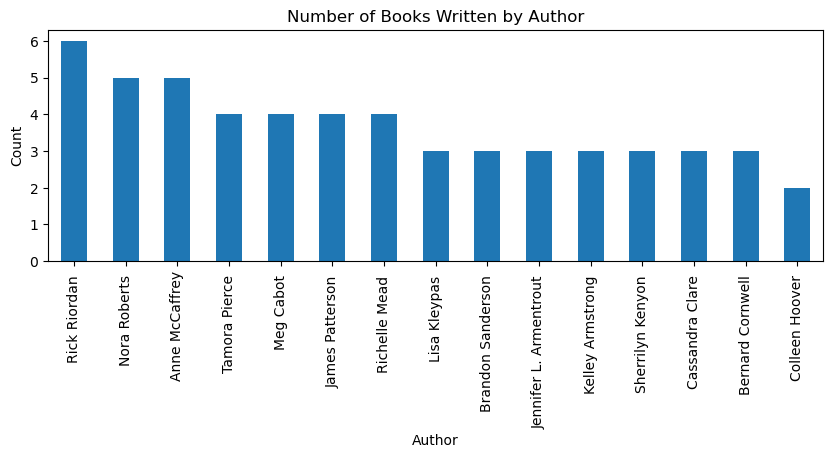

In [130]:
plt.figure(figsize=(10,3))
df["Author"].value_counts().head(15).plot.bar()
plt.xlabel('Author')
plt.ylabel(('Count'))
plt.title('Number of Books Written by Author')
plt.xticks(rotation=90)
plt.show()


### Observation:

 >* From the above bar plot we observed that there are three Authors who wrote maximum number of Books, that means the three Authors are repeated in the column

### > I want to know the percentage of individual Overview

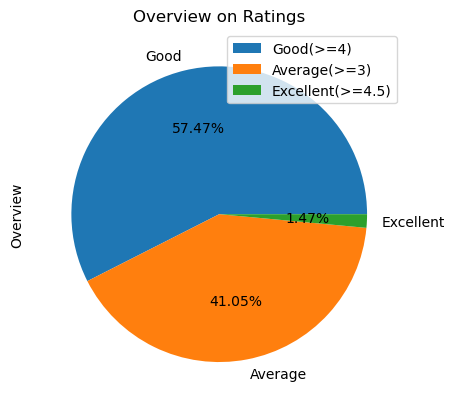

In [131]:
# pie plot

df['Overview'].value_counts().plot.pie(autopct="%.2f%%")
plt.title('Overview on Ratings')
plt.legend(['Good(>=4)','Average(>=3)','Excellent(>=4.5)'])
plt.show()

#### Observation

>* From the above pie chart we observed that most of the Books have Good Overview, means most of the books have ratings between 4 and 4.5

### > I want to know the count of Overview

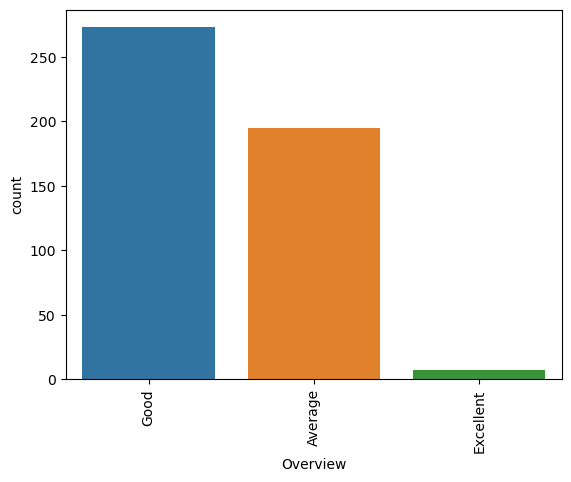

In [132]:
sns.countplot(x=df['Overview'], data=df)
plt.xticks(rotation = 90)
plt.show()

#### Observation:

>* From the above bar plot we can observe that tere are more than 250 Good Overview, more than 150 Average Overview and less than 25 Excellent Overview. 

### I want to show the relation between `Hashtag` and `Denotes` columns

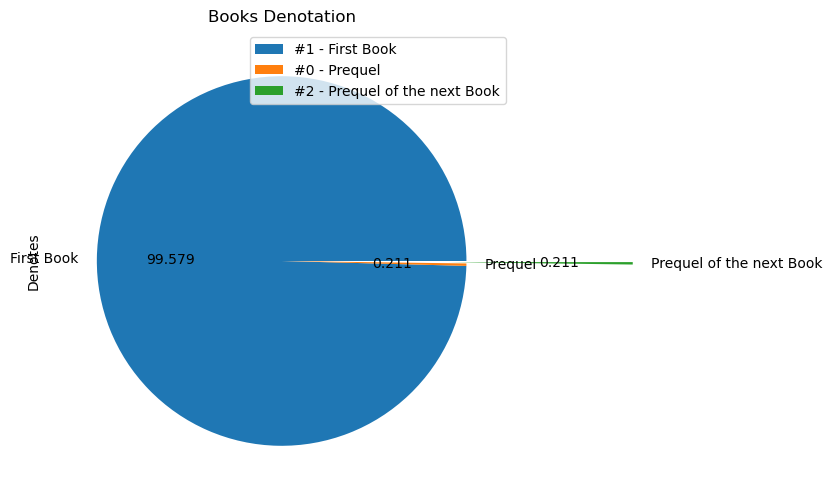

In [133]:
plt.figure(figsize=(6,6))
df["Denotes"].value_counts().plot.pie(explode=[0,0,0.9],autopct='%.3f')
plt.title('Books Denotation')
plt.legend(['#1 - First Book','#0 - Prequel','#2 - Prequel of the next Book'])
plt.show()

### Observation:

>* From the above pie plot we obseved that most of Books are denoted as #1 which are the First Book of the Series

### > I want to know the Density of Votes

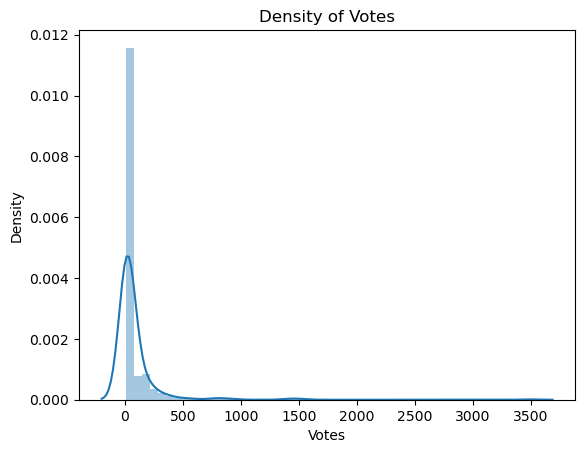

In [134]:
sns.distplot(df['Votes'],kde=True)
plt.title('Density of Votes')
plt.show()

>* From the above plot we can observe that most of the Books got Votes between 0 to 500 and very few Books got Votes greater than 1000

### To know the frequency of Ratings


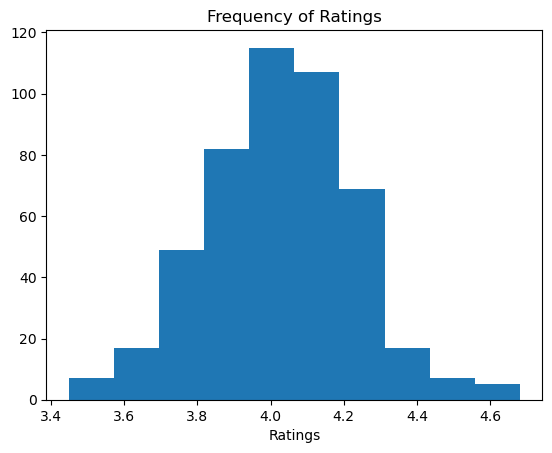

In [135]:
plt.hist(df['Ratings'])
plt.xlabel('Ratings')
plt.title('Frequency of Ratings')
plt.show()

### Observation

* This hist plot denotes Frequency distribution of Ratings

* We can observe that 4.12 rating has highest frequency 

## Bivariate

### Categorical and Numerical

### > I want to know which Series got Votes above 1000

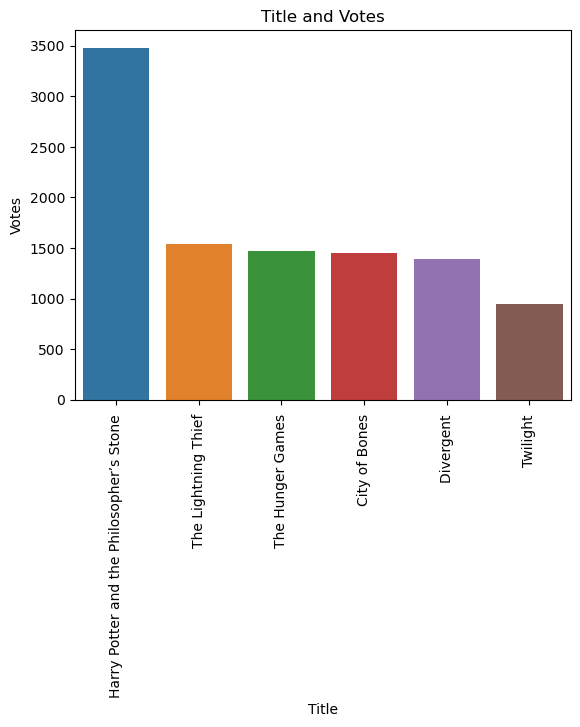

In [136]:

sns.barplot(x=df['Title'].head(6),y=df['Votes'],data=df)
plt.xticks(rotation = 90)
plt.title('Title and Votes')
plt.show()

>* From the above bar plot we can observe that Harry Potter and the Sorcerer's Stone Book got Votes above 3000 and 4 more Books more above 1000

### > Relation between Votes and Score

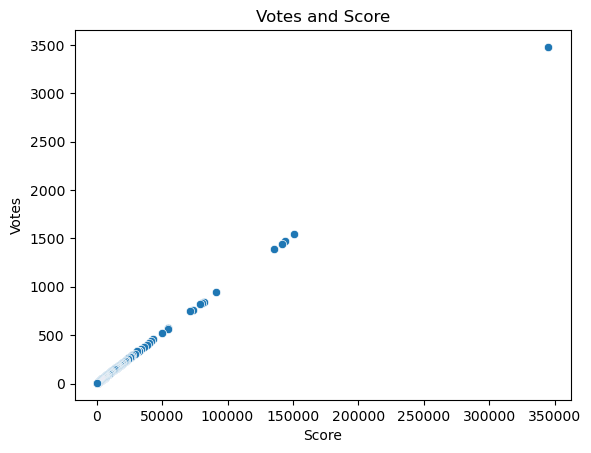

In [137]:
# Scatter plot

sns.scatterplot(x=df['Score'],y=df['Votes'],data=df)
plt.title('Votes and Score')
plt.show()

>* There is perfect positive correlation between Score and Votes nearly equal to 1 . So they depend on each other


### > Relation between Ratings and Reviews

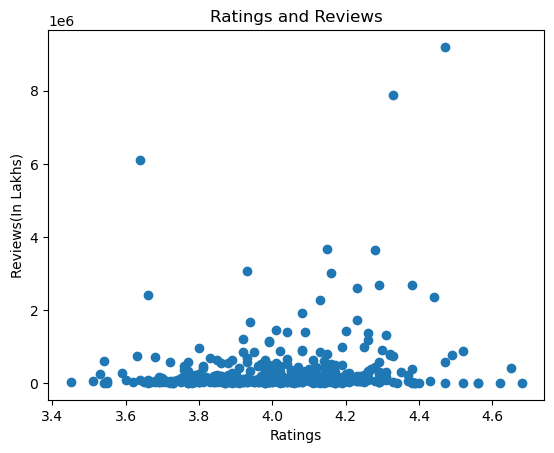

In [138]:
x=df['Ratings']
y=df['Reviews']
plt.xlabel('Ratings')
plt.ylabel('Reviews(In Lakhs)')
plt.title('Ratings and Reviews')
plt.scatter(x,y)
plt.show()

### Observation

>* From the above plot we can see Ratings and Reviews are not correlated, and they does'nt depend on each other

### Box plot

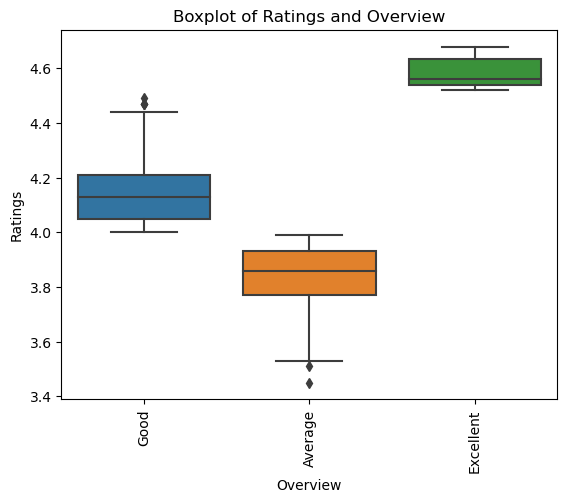

In [139]:
sns.boxplot(data=df,x='Overview', y='Ratings')
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings and Overview')
plt.show()

>* From the above plot we can see that there are outlayers only for Good and Average.

### violin plot

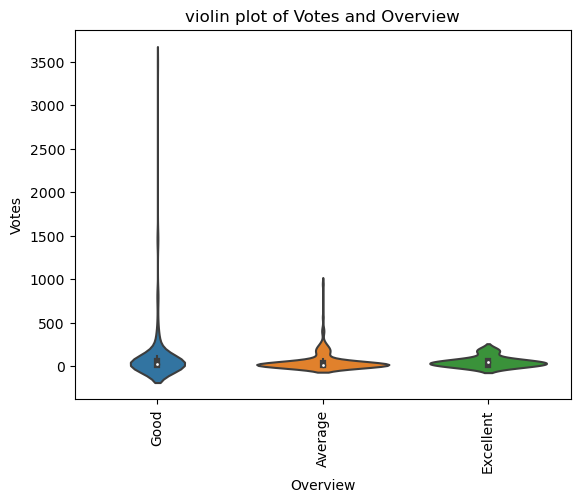

In [140]:
sns.violinplot(y=df['Votes'],x=df['Overview'],data=df)
plt.xticks(rotation = 90)
plt.title('violin plot of Votes and Overview')
plt.show()

### Observation

>* From the above plot we can see that Average Overviewed Series have highest density of Votes

### Multivariate

In [141]:
v=df.select_dtypes(include='number')
v

,Score,Votes,Ratings,Reviews
0,344918,3480,4.47,9201052
1,150442,1543,4.29,2668080
2,143820,1472,4.33,7891238
3,141209,1446,4.08,1905288
4,135223,1393,4.15,3678693
...,...,...,...,...
470,546,8,4.20,77516
471,545,6,4.07,30090
472,545,7,4.04,23282
473,540,8,4.38,32094


### heatmap 

<AxesSubplot:>

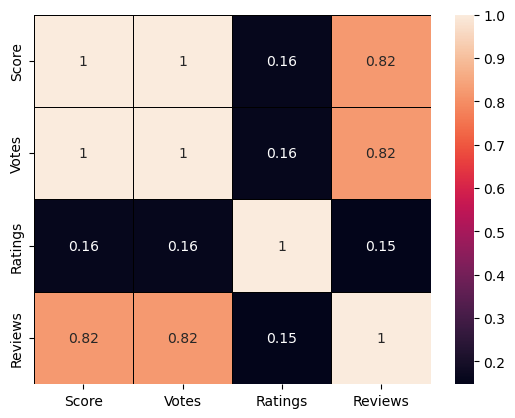

In [142]:
sns.heatmap(v.corr(),annot=True,linewidth=.5,linecolor='black')

>* From the above heatmap plot we can observe that all numerical values are positively correlated. Score and Votes are highly correlated which means as Votes increases Score increases.Ratings and Reviews are less correlated which is nearly equal to zero

### pair plot

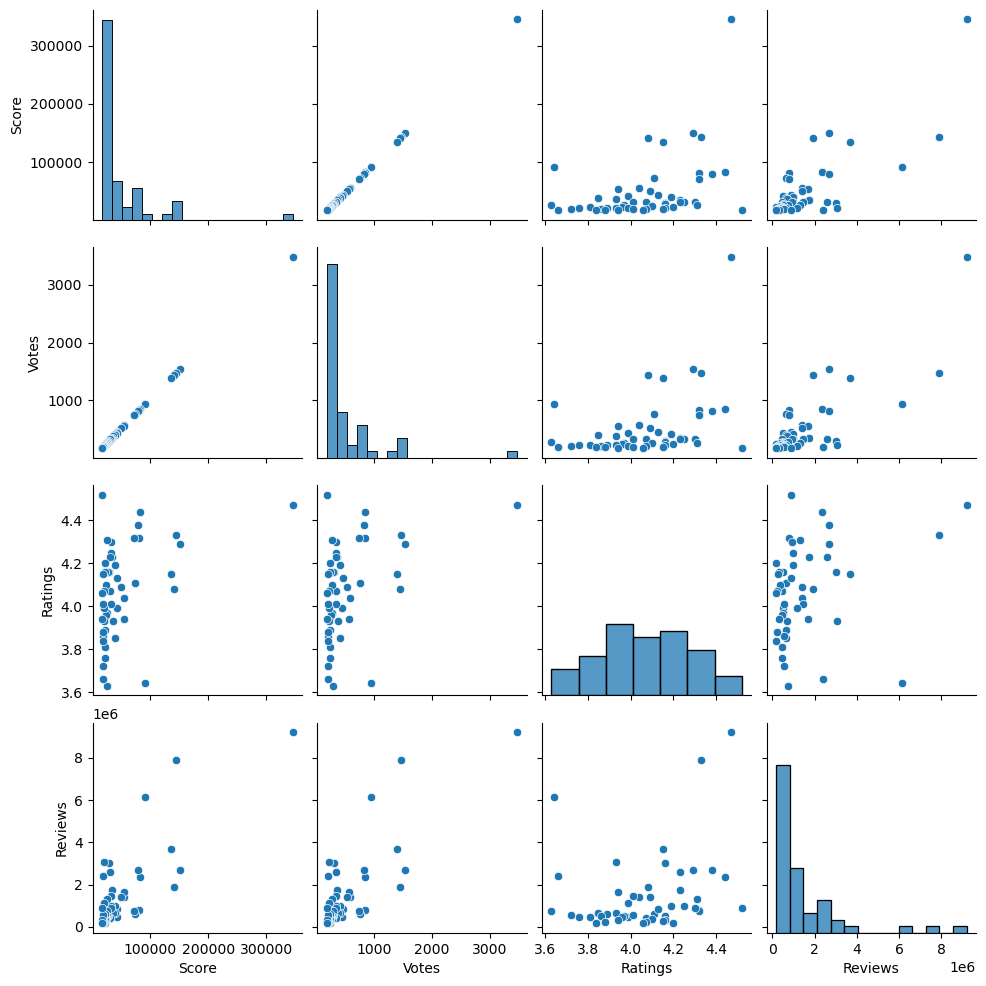

In [143]:
sns.pairplot(df.head(50))
plt.show()

### Observation

>* From the above pair plot we observed the both distribution of single variable and relation between two variable

### Scenario

In [ ]:
a=float(input('Enter any Ratings greater than 4 but less than 5:'))
b=int(input('Enter any Votes greater than 1000 but less less than 3500:'))
c=int(input('Enter any Score greater than 200000 but less than 344000:'))
d=int(input('Enter any Reviews greater than 7900000 but less than 9100000:'))

In [ ]:
df[(df['Ratings']>a)&(df['Votes']>b)&(df['Score']>c)&(df['Reviews']>d)]